In [1]:
import network
import matplotlib.pyplot as plt
import numpy as np

## Aufgabe 4

> Testen verschiedener Verteilungen der Gewichte in der Initialisierung

In [2]:
def xor(y1, y2):
    return 1.0 * ((y1 * y2) < 0)

xrange=np.linspace(-0.5,0.5,40)
X0,X1=np.meshgrid(xrange,xrange)

test_batchsize=np.shape(X0)[0]*np.shape(X0)[1]
testsample=np.zeros([test_batchsize,2])
testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()



> Gleichverteilte Gewichte (wie Aufgabe 1) 

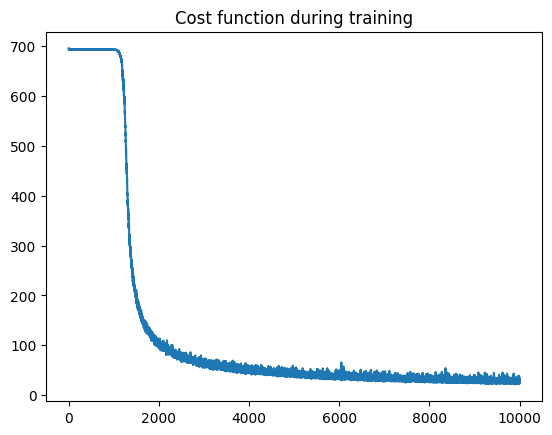

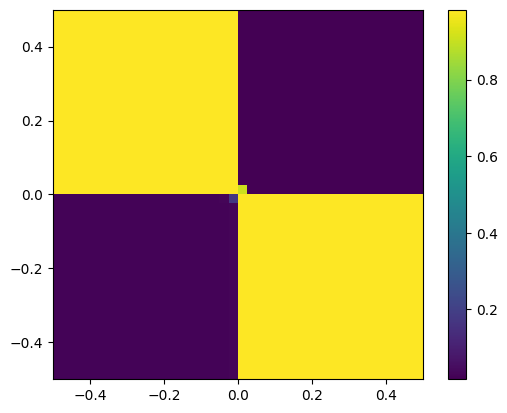

In [6]:
XOR_Network = network.Network(layer_sizes=[2, 6, 6, 1],
                              activation_function_id='sigmoid',
                              cost_function_id='cross_entropy',
                              batch_size=1000,
                              eta=.5,
                              target_function=xor,
                              weight_func=lambda s: network.uniform_weights(s, low=-0.1, high=0.1))

XOR_Network.train_network(10000)
res, _, _ = XOR_Network.apply_net(testsample) 

plt.imshow(np.reshape(res, np.shape(X0)),
           interpolation='nearest', origin='lower',
           extent=(xrange[0],xrange[-1],xrange[0],xrange[-1]))
plt.colorbar()
plt.show()

> Gaußverteilte Gewichte mit 5 mal so vielen Batches und sehr kleinen lern rate

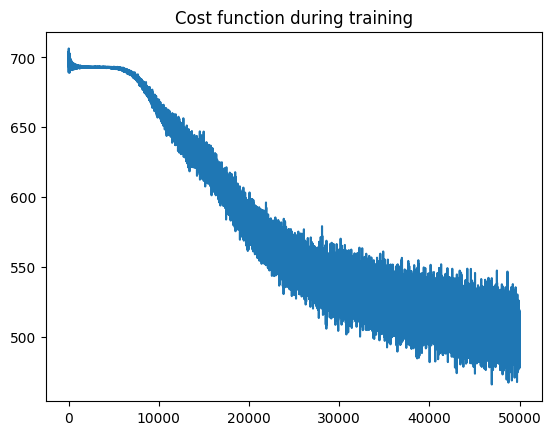

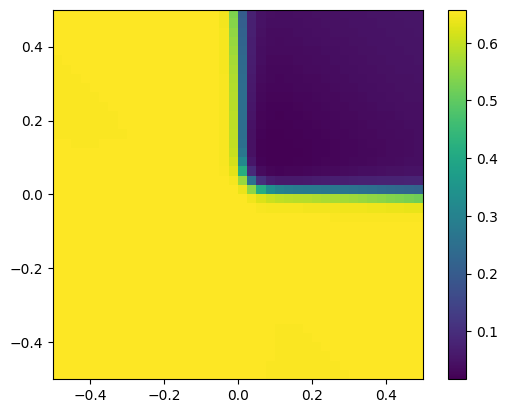

In [10]:
XOR_Network = network.Network(layer_sizes=[2, 6, 6, 1],
                              activation_function_id='sigmoid',
                              cost_function_id='cross_entropy',
                              batch_size=1000,
                              eta=.01,
                              target_function=xor,
                              weight_func=lambda s: network.gaus_weights(s, low=-0.1, high=0.1))

XOR_Network.train_network(50000)
res, _, _ = XOR_Network.apply_net(testsample) 

plt.imshow(np.reshape(res, np.shape(X0)),
           interpolation='nearest', origin='lower',
           extent=(xrange[0],xrange[-1],xrange[0],xrange[-1]))
plt.colorbar()
plt.show()